In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
  return x**2

def func_grad(x):
  return x*2

def gradient_descent(lr,func_grad):
  x=-10
  x_values=[x]
  for i in range(10):
    x-=lr*func_grad(x)
    x_values.append(x)
    print("iteration 10, x:%s"%x)
  return x_values                 


In [7]:
def search_path(x_vals,func):
  x_line=np.arange(-15,15,.01)
  plt.plot(x_line,[func(x) for x  in x_line])
  plt.plot(x_vals,[func(x) for x  in x_vals],"ro-")
      

iteration 10, x:-8.0
iteration 10, x:-6.4
iteration 10, x:-5.12
iteration 10, x:-4.096
iteration 10, x:-3.2768
iteration 10, x:-2.62144
iteration 10, x:-2.0971520000000003
iteration 10, x:-1.6777216000000004
iteration 10, x:-1.3421772800000003
iteration 10, x:-1.0737418240000003


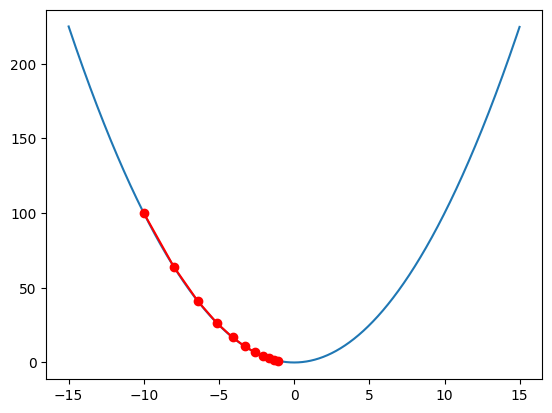

In [8]:
x_values=gradient_descent(.1,func_grad)
search_path(x_values,func)

two dimention

In [3]:
def func(x1,x2):
  return x1**2+ 2*x2**2

def func_grad(x1,x2):
  return (2*x1, 4*x2)

In [39]:
class Optimizers:
  def __init__(self, lr_schedule, rate=0.01):
    self.lr_schedule=self.lr(lr_schedule, rate)
    
  def lr(self,lr_schedule,rate):
    if lr_schedule=="constant" :
      return self.constant_lr(rate)
    
  def  constant_lr(self,rate): 
    return rate
  
  def gradient_descent(self,x1,x2,t1,t2,func_grad):
    gr_x1, gr_x2= func_grad(x1,x2)
    return   x1-self.lr_schedule*gr_x1, x2-self.lr_schedule*gr_x2,0,0
  
  def stochastic_gradient_descent(self,x1,x2,t1,t2,func_grad):
    gr_x1, gr_x2= func_grad(x1,x2)
    gr_x1 += np.random.normal(0,1) 
    gr_x2 += np.random.normal(0,1) 
    return   x1-self.lr_schedule*gr_x1, x2-self.lr_schedule*gr_x2,0,0
  
  def stochastic_gradient_descent_with_momentum(self,x1,x2,v1,v2,func_grad):
    alpha=0.9
    gr_x1,gr_x2= func_grad(x1,x2)
    v1=alpha*v1- self.lr_schedule*gr_x1
    v2=alpha*v1- self.lr_schedule*gr_x2
    return x1+v1,x2+v2,v1,v2
  
  def nesterov_stochastic_gradient_descent_with_momentum(self,x1,x2,v1,v2,func_grad):
    alpha=0.9
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1,gr_x2= func_grad(x1,x2)
    v1=alpha*v1- self.lr_schedule*gr_x1
    v2=alpha*v1- self.lr_schedule*gr_x2
    return x1+v1,x2+v2,v1,v2
  
  def Ada_Grad(self,x1,x2,r1,r2,func_grad):
    delta= 1e-7
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 +=gr_x1**2
    r2 +=gr_x1**2
    x1 -= self.lr_schedule/(delta+np.sqrt(r1))*gr_x1
    x2 -= self.lr_schedule/(delta+np.sqrt(r2))*gr_x2
    return x1,x2,r1,r2
  def RMS_Prop(self,x1,x2,r1,r2,func_grad):
    p=0.9
    delta=1e-7
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 = p*r1 + (1-p)*gr_x1**2
    r2 = p*r2 + (1-p)*gr_x2**2
    x1 -= self.lr_schedule/np.sqrt(delta+r1)*gr_x1
    x2 -= self.lr_schedule/np.sqrt(delta+r2)*gr_x2
    
    return x1,x2,r1,r2
  
  def RMS_Prop_with_Nesterov(self,x1,x2,r1,r2,v1,v2,func_grad,p=0.9,alpha=0.9):
    
    delta= 1e-7
    x1 += alpha*v1
    x2 += alpha*v2
    gr_x1,gr_x2= func_grad(x1,x2)
    r1 = p*r1 + (1-p)*gr_x1**2
    r2 = p*r2 + (1-p)*gr_x2**2
    v1=alpha*v1-(delta/np.sqrt(r1))*gr_x1
    v2=alpha*v1-(delta/np.sqrt(r2))*gr_x2
    return x1+v1,x2+v2,r1,r2,v1,v2

In [40]:
def search(optimizer,func_grad,iteration=20):
  x1,x2,t1,t2=-5,-2, 0, 0
  x_iterations=[(x1,x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad)
    x_iterations.append((x1,x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1,x1,x2))
  return x_iterations
    

In [41]:
def search_path(func,x_iterations):
  plt.plot(*zip(*x_iterations),"-o",color="red")
  x1,x2=np.meshgrid(np.arange(-5.5, 5.5, 0.1),np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1,x2,func(x1,x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

In [13]:
list(zip([1,2,3],["a","b","c"]))

[(1, 'a'), (2, 'b'), (3, 'c')]

In [16]:
list(zip(*[(1,2),(3,5),(8,4)]))

[(1, 3, 8), (2, 5, 4)]

epoch 20, x1:-0.057646075230342354, x2:-7.312316880125945e-05


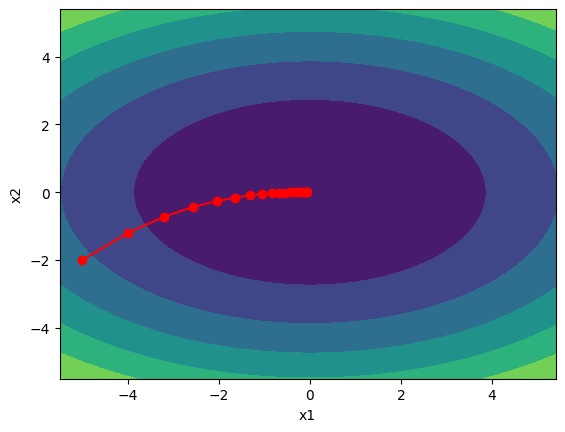

In [75]:
opt=Optimizers("constant",0.1)
search_path(func,search(opt.gradient_descent,func_grad))

epoch 20, x1:-3.324157757171576, x2:-0.8565465606888084


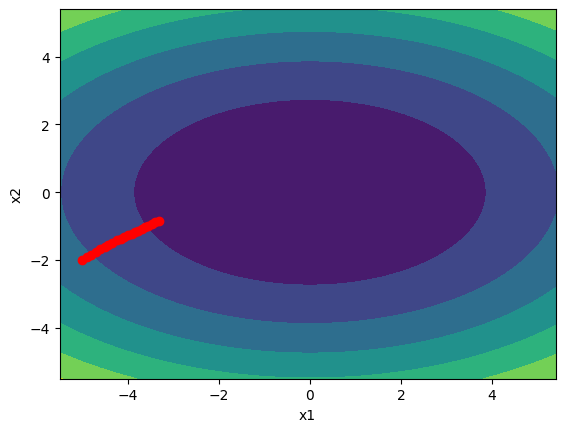

In [107]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.stochastic_gradient_descent,func_grad))

epoch 20, x1:1.353356690803952, x2:3.0017558115343386


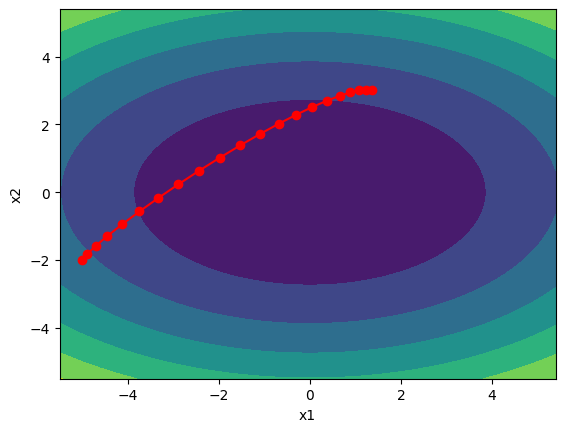

In [106]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.stochastic_gradient_descent_with_momentum,func_grad))

epoch 20, x1:1.6148263020774718, x2:1.7150445965973584


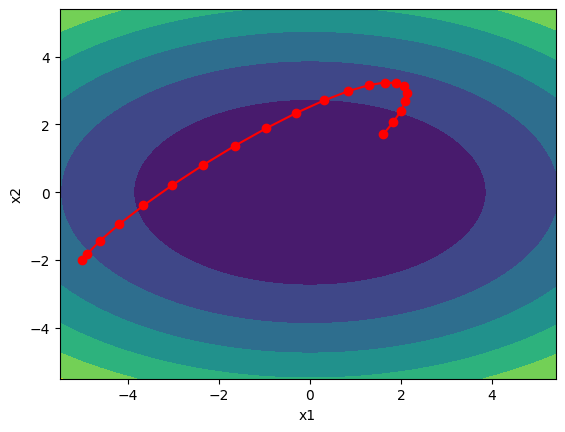

In [43]:
opt=Optimizers("constant",0.01)
search_path(func,search(opt.nesterov_stochastic_gradient_descent_with_momentum,func_grad))

epoch 20, x1:-0.39647637952282616, x2:-0.008499186831917357


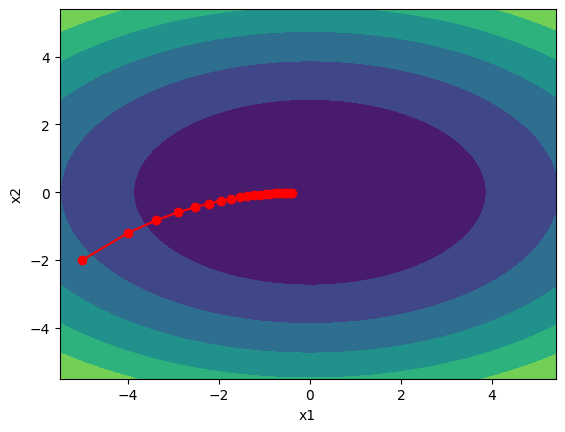

In [124]:
opt=Optimizers("constant",1)
search_path(func,search(opt.Ada_Grad,func_grad))

epoch 20, x1:-0.000343174646715899, x2:4.843326533006444e-13


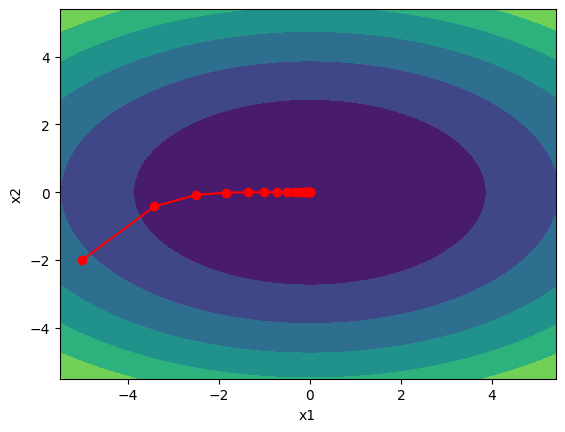

In [21]:
opt=Optimizers("constant",0.5)
search_path(func,search(opt.RMS_Prop,func_grad))

my answer

In [ ]:
def new_search(optimizer,func_grad,iteration=20):
  x1,x2,t1,t2,v1,v2=-5,-2, 0, 0, 0, 0 
  x_iterations=[(x1,x2)]
  for i in range(iteration):
    x1, x2, t1, t2,v1,v2 = optimizer(x1, x2, t1, t2,v1,v2, func_grad)
    x_iterations.append((x1,x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1,x1,x2))
  return x_iterations
    

In [ ]:
def search_path(func,x_iterations):
  plt.plot(*zip(*x_iterations),"-o",color="red")
  x1,x2=np.meshgrid(np.arange(-5.5, 5.5, 0.1),np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1,x2,func(x1,x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch 20, x1:-4.999965264939706, x2:-1.9999634063093799


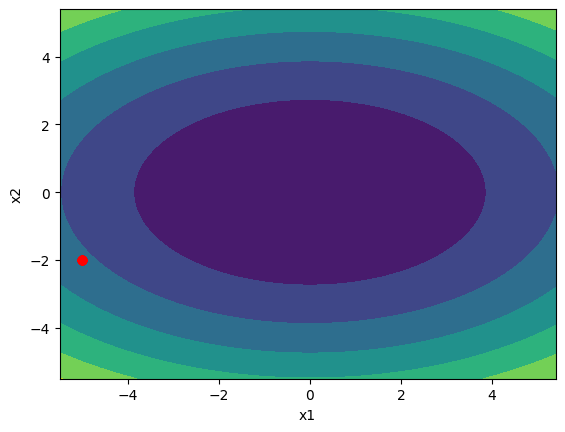

In [42]:
opt=Optimizers("constant",0.5)
search_path(func,new_search(opt.RMS_Prop_with_Nesterov,func_grad))